<a href="https://colab.research.google.com/github/animesh-am/CodeClause_Internship/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Data Analysis
### - *Animesh Maity*

##### [*github profile link*](https://github.com/animesh-am)

Please star if it helped you.

## 1. Setting Up the Environment and Loading the Dataset

### 1.1. Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import IPython.display as dsp
import plotly.express as px

### 1.2. Displaying Uber Logo
For presentation purposes, we'll display the Uber logo.

In [2]:
dsp.Image(url="https://www.travelandleisure.com/thmb/jHJfM-2ybJfIhNvz7Q8itEhASBQ=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/uber-UBERREPORT0822-5a425bab6df149adadfba64cd2e8c5b8.jpg",height=500,width=1100)

### 1.3 Loading the Dataset

In [3]:
# First upload kaggle api obtained from kaggle as json file

from google.colab import files
files.upload()  # Choose the kaggle.json file that you downloaded

if not os.path.exists('kaggle.json'):
    raise ValueError("kaggle.json is not uploaded. Please upload the Kaggle API key to proceed.")

!pip3 install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d zusmani/uberdrives
!mv uberdrives.zip uber_data.zip
!unzip -o uber_data.zip

for file_name in os.listdir("."):
    if file_name.endswith(".csv"):
        os.rename(file_name, "uber_data.csv")

!rm ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 31.3MB/s]
Archive:  uber_data.zip
  inflating: My Uber Drives - 2016.csv  


In [4]:
data = pd.read_csv('/content/uber_data.csv')

## Data Cleaning & Initial Exploration

### 2.1. Snapshot of the Dataset

In [5]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### 2.2. Data Structure & Missing Values

In [6]:
data.info()
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB

Missing Values in Each Column:
START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [7]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

### 2.3. Renaming Columns

In [9]:
# Renaming columns for consistency
data.rename(columns={
    'START_DATE*':'start_date',
    'END_DATE*':'end_date',
    'CATEGORY*':'category',
    'START*':'start',
    'STOP*':'stop',
    'MILES*':'miles',
    'PURPOSE*':'purpose'
}, inplace=True)
# The pickup point 'Karachi' is written as 'Kar?chi' so we need to change it back
data.loc[data['start'] == 'Kar?chi', 'start'] = 'Karachi'
data.loc[data['stop'] == 'Kar?chi', 'stop'] = 'Karachi'

In [10]:
data.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

### 2.4. Data Corrections

`data['start_date'] = pd.to_datetime(data['start_date'])`

*This line produces an error if we try to format it using datetime: ParserError: Unknown string format: Totals present at position 1155*

In [11]:
data.iloc[[1155]]

,start_date,end_date,category,start,stop,miles,purpose
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [12]:
data.drop([1155], axis=0, inplace=True)

## 3. Data Transformation & Feature Engineering

### 3.1. Date and Time Transformations

In [13]:
# Converting 'start_date' and 'end_date' to datetime format
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

# Extracting hour, day, month, and day of week
data['hour'] = [x.hour for x in data['start_date']]
data['day_name']=data['start_date'].dt.day_name()
data['month_name'] = data['start_date'].dt.month_name()
data['weekday'] = [calendar.day_name[x.dayofweek] for x in data['start_date']]
data['dayofweek'] = [x.dayofweek for x in data['start_date']]

data.head()

,start_date,end_date,category,start,stop,miles,purpose,hour,day_name,month_name,weekday,dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,Friday,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,Saturday,January,Saturday,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,Wednesday,2


### 3.2. Handling Duplicates and Missing Values
Duplicates can skew our analysis, and missing values can lead to inaccuracies. We'll address both issues in this step.

In [14]:
data[data.duplicated()]

,start_date,end_date,category,start,stop,miles,purpose,hour,day_name,month_name,weekday,dayofweek
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,23,Tuesday,June,Tuesday,1


In [15]:
data.drop([492],axis=0,inplace=True)

In [16]:
data[data.duplicated()]

,start_date,end_date,category,start,stop,miles,purpose,hour,day_name,month_name,weekday,dayofweek


In [17]:
data.isna().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       502
hour            0
day_name        0
month_name      0
weekday         0
dayofweek       0
dtype: int64

In [18]:
data['purpose'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64

In [19]:
data['purpose']=data['purpose'].replace(np.nan,'Purpose Not Defined')

In [20]:
data['purpose'].value_counts()

Purpose Not Defined    502
Meeting                186
Meal/Entertain         160
Errand/Supplies        128
Customer Visit         101
Temporary Site          50
Between Offices         18
Moving                   4
Airport/Travel           3
Charity ($)              1
Commute                  1
Name: purpose, dtype: int64

In [21]:
data.isna().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
hour          0
day_name      0
month_name    0
weekday       0
dayofweek     0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

Now, we'll dive deep into the data to extract insights and patterns.

### 4.1. Trip Categories Analysis
Analyzing the different categories of trips.

In [22]:
px.bar(data, x=data['category'].value_counts().keys(), y=data['category'].value_counts(), color=data['category'].value_counts().keys(), title='Distribution of Trip Categories')

### 4.2. Trip Purpose Analysis

Understanding the primary reasons for trips.

In [23]:
px.bar(data,x=data['purpose'].value_counts().keys(),y=data['purpose'].value_counts(),color=data['purpose'].value_counts().keys(),title='Purpose To Travel')

### 4.3. Day-wise Trip Distribution
Analyzing the number of trips taken on each day of the week.

In [24]:
data['day_name'].value_counts()

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: day_name, dtype: int64

In [25]:
px.bar(data, x=data['day_name'].value_counts().keys(), y=data['day_name'].value_counts(), color=data['day_name'].value_counts().keys(), title='Distribution of Trips by Day of the Week')

### 4.4. Month-wise Trip Distribution
This visualization helps in understanding the distribution of trips across different months.

In [26]:
data['month_name'].value_counts()

December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: month_name, dtype: int64

In [27]:
px.bar(data,x=data['month_name'].value_counts().keys(),y=data['month_name'].value_counts(),color=data['month_name'].value_counts().keys(),title='Months To Travel')

### 4.5. Start Location Analysis
Analyzing the most popular starting points for the trips.

In [28]:
data['start'].value_counts()

Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Ridgeland              1
Daytona Beach          1
Sky Lake               1
Sand Lake Commons      1
Gampaha                1
Name: start, Length: 176, dtype: int64

In [29]:
px.bar(data,x=data['start'].value_counts().keys(),y=data['start'].value_counts(),color=data['start'].value_counts().keys(),title='Start Location To Travel')

### 4.6. Stop Location Analysis
Understanding the most common destinations.

In [30]:
data['stop'].value_counts()

Cary                 202
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: stop, Length: 187, dtype: int64

In [31]:
px.bar(data,x=data['stop'].value_counts().keys(),y=data['stop'].value_counts(),color=data['stop'].value_counts().keys(),title='Stop Location To Travel')

### 4.7. Hourly Distribution of Trips
This helps in identifying the peak hours for trips.

Text(0.5, 1.0, 'Number of Trips Vs Hours')

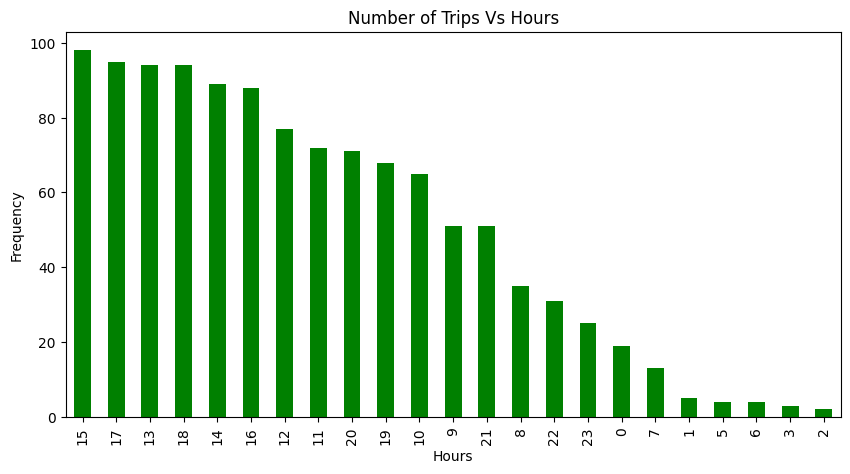

In [32]:
hours = data['hour'].value_counts()
hours.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Number of Trips Vs Hours")

### 4.8. Monthly Trip Distribution

Text(0.5, 1.0, 'Number of Trips Vs Months')

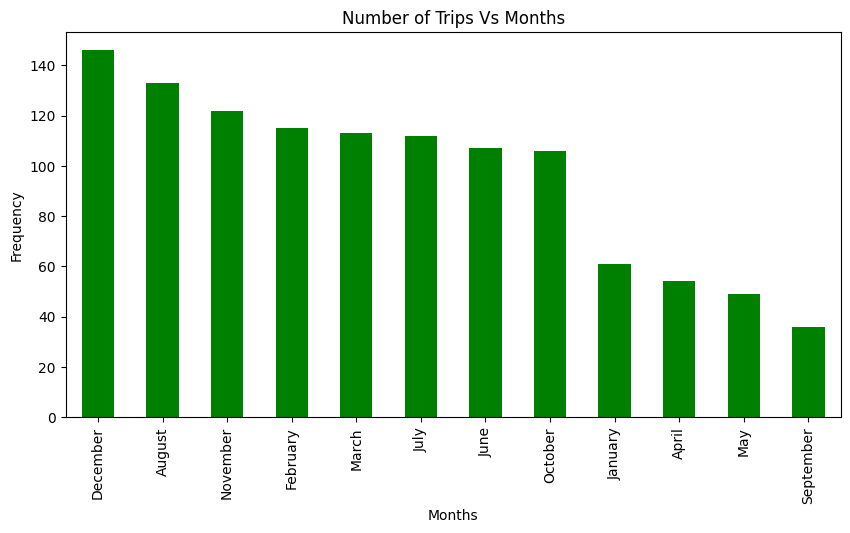

In [33]:
months = data['month_name'].value_counts()
months.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Number of Trips Vs Months")

### 4.9. Analysis of Trips in December
A deeper dive into the busiest days in December.

Text(0.5, 1.0, 'Number of Trips Vs Days in December')

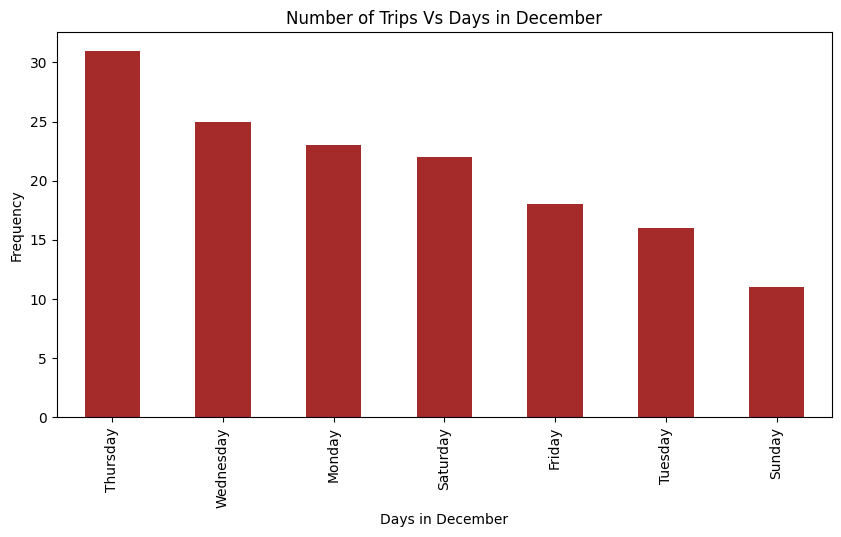

In [35]:
months = data['day_name'][data['month_name']=='December'].value_counts()
months.plot(kind='bar',color='brown',figsize=(10,5))
plt.xlabel('Days in December')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Days in December')

### 4.10. Top 10 Pickup Points
Identifying the most common pickup points.

Text(0.5, 1.0, 'Top 10 Pickup Points')

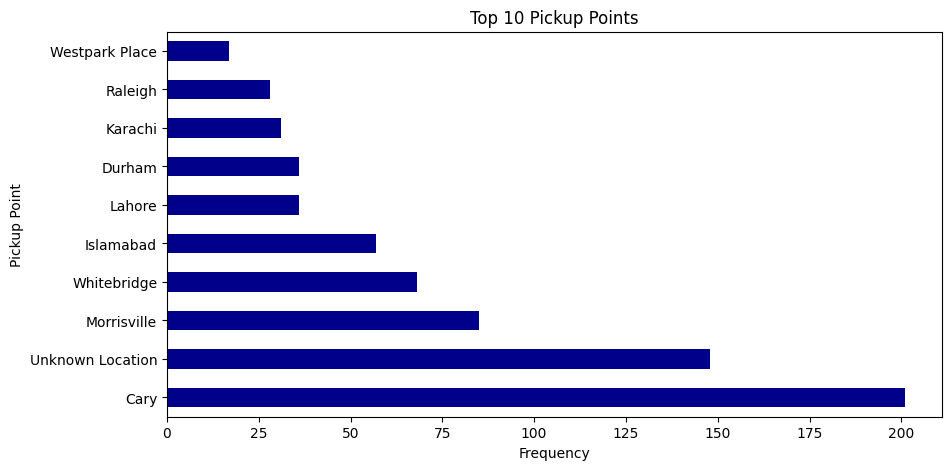

In [36]:
top_starts = data['start'].value_counts().nlargest(10)
top_starts.plot(kind='barh', color='darkblue', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')
plt.title('Top 10 Pickup Points')

### 4.11. Top 10 Drop-off Points
Identifying the most common drop-off destinations.

Text(0.5, 1.0, 'Top 10 Drop-off Points')

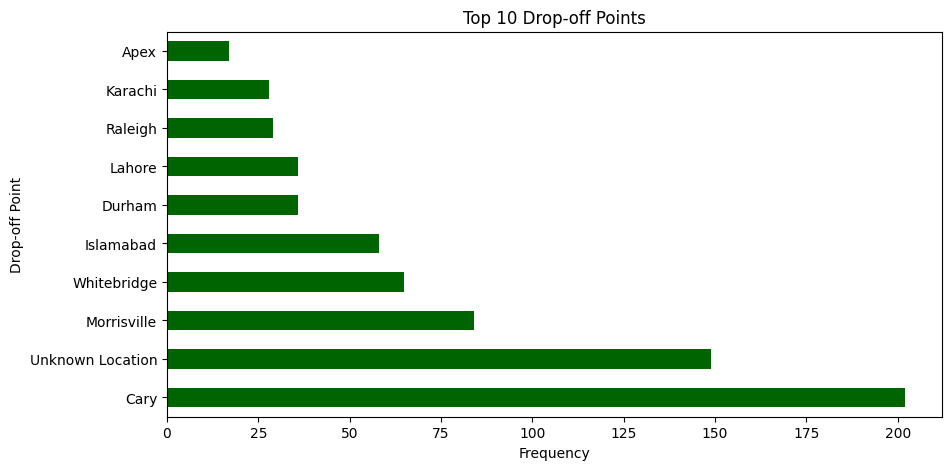

In [37]:
top_stops = data['stop'].value_counts().nlargest(10)
top_stops.plot(kind='barh', color='darkgreen', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Drop-off Point')
plt.title('Top 10 Drop-off Points')


### 4.11. Frequency of Pickup Points


Text(0.5, 1.0, 'Pickup point Vs Frequency')

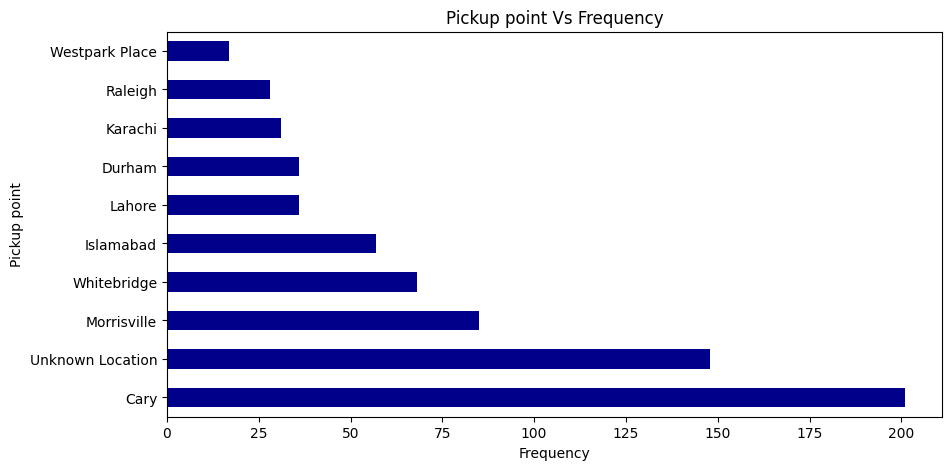

In [38]:
months = data['start'].value_counts().nlargest(10)
months.plot(kind='barh',color='darkblue', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup point')
plt.title('Pickup point Vs Frequency')

### 4.11. Frequency of Destination Points

Text(0.5, 1.0, 'Destination point Vs Frequency')

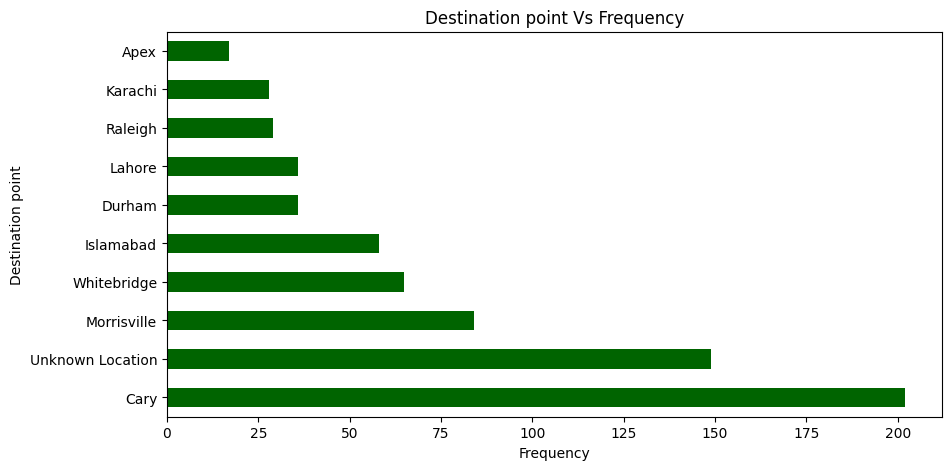

In [39]:
months = data['stop'].value_counts().nlargest(10)
months.plot(kind='barh',color='darkgreen', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Destination point')
plt.title('Destination point Vs Frequency')

## 5. Deeper Insights from Data

### 5.1. Average Distance by Purpose
This can help in understanding the typical distance covered for each trip purpose.

Text(0.5, 1.0, 'Average Distance by Trip Purpose')

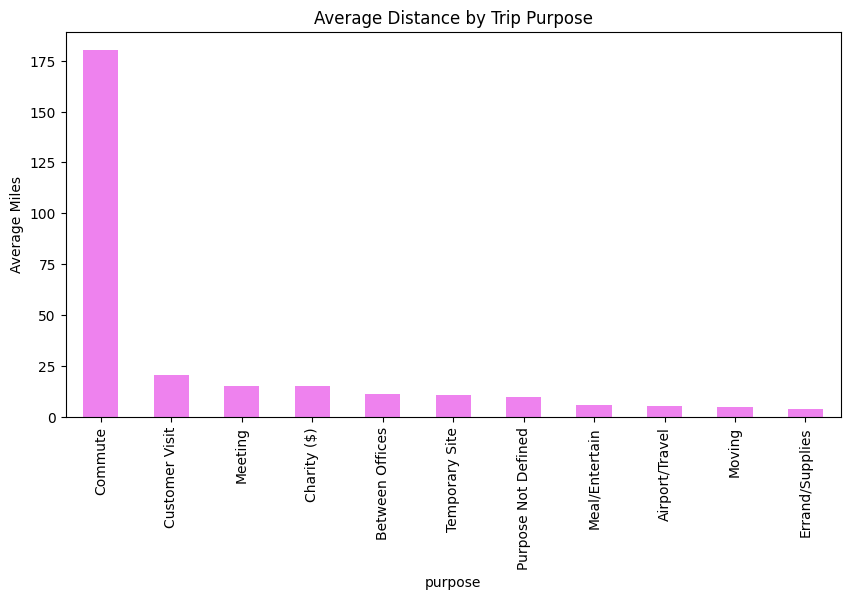

In [40]:
avg_distance = data.groupby('purpose')['miles'].mean().sort_values(ascending=False)
avg_distance.plot(kind='bar', color='violet', figsize=(10,5))
plt.ylabel('Average Miles')
plt.title('Average Distance by Trip Purpose')


### 5.2. Trip Duration Analysis
Understanding how long, on average, each trip takes can offer insights into traffic, efficiency, or typical use-cases of the service.

Text(0.5, 1.0, 'Average Trip Duration by Purpose')

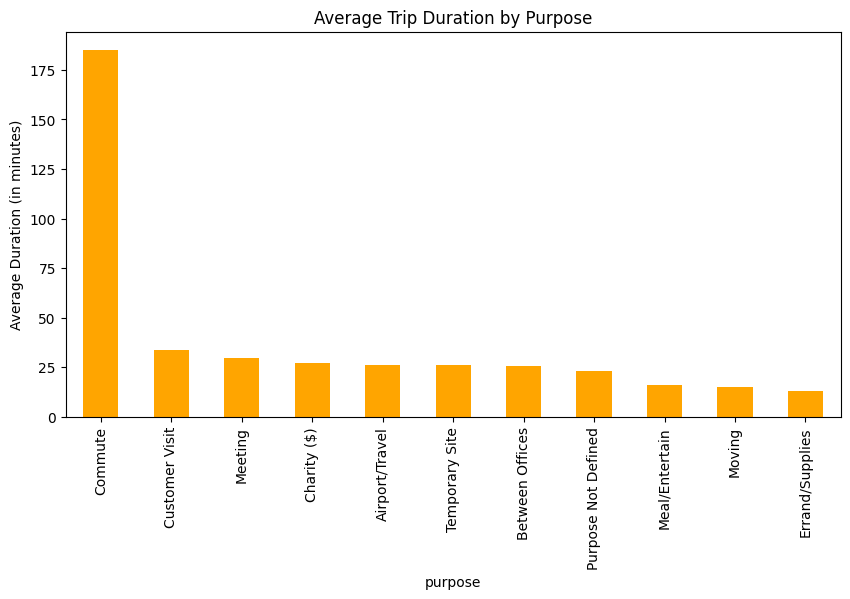

In [41]:
data['duration'] = (data['end_date'] - data['start_date']).dt.total_seconds() / 60  # duration in minutes
avg_duration = data.groupby('purpose')['duration'].mean().sort_values(ascending=False)
avg_duration.plot(kind='bar', color='orange', figsize=(10,5))
plt.ylabel('Average Duration (in minutes)')
plt.title('Average Trip Duration by Purpose')


### 5.3. Analysis of Speed
Getting an understanding of the average speed can shed light on trip conditions.

Text(0.5, 1.0, 'Average Speed by Trip Purpose')

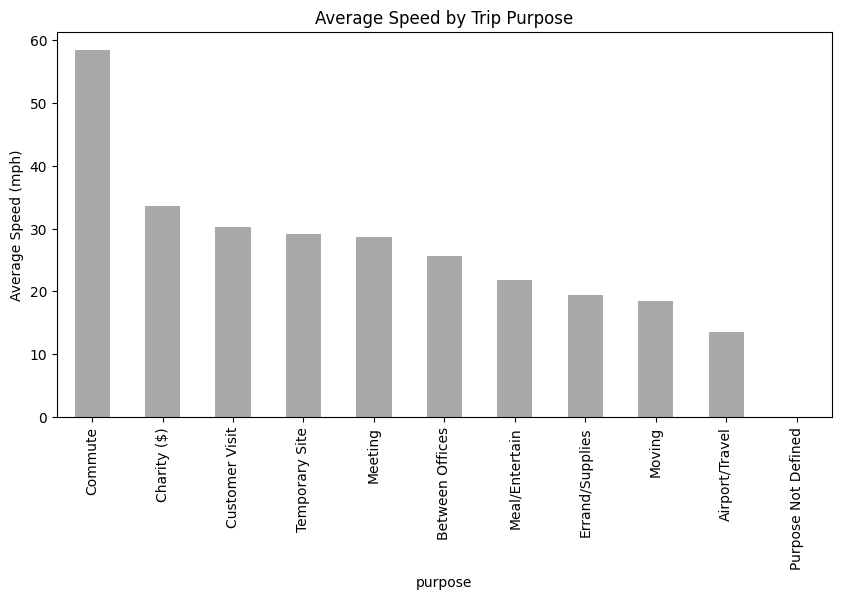

In [42]:
data['speed'] = data['miles'] / (data['duration'] / 60)  # mph
avg_speed = data.groupby('purpose')['speed'].mean().sort_values(ascending=False)
avg_speed.plot(kind='bar', color='darkgrey', figsize=(10,5))
plt.ylabel('Average Speed (mph)')
plt.title('Average Speed by Trip Purpose')


### 5.4. Weekend vs. Weekday Trips
Understanding user behavior based on the day of the week can provide insights into usage patterns.

Text(0.5, 1.0, 'Weekend vs. Weekday Trips')

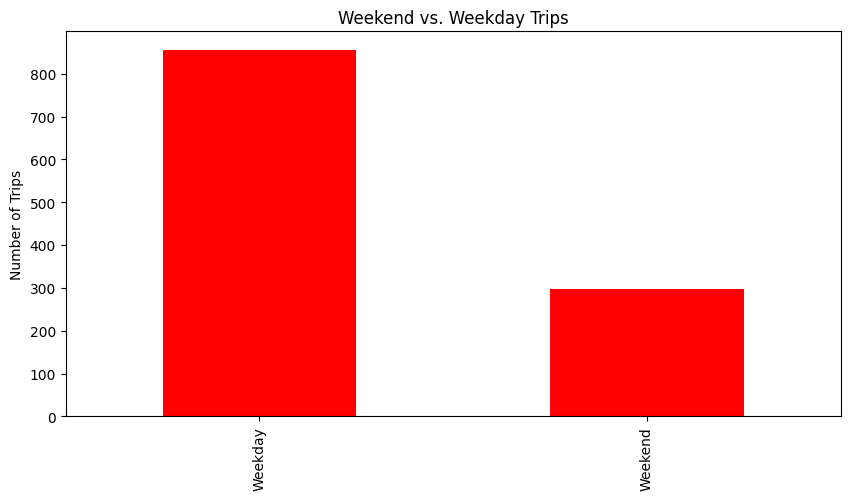

In [43]:
data['is_weekend'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
weekend_counts = data['is_weekend'].value_counts()
weekend_counts.index = ['Weekday', 'Weekend']
weekend_counts.plot(kind='bar', color='red', figsize=(10,5))
plt.ylabel('Number of Trips')
plt.title('Weekend vs. Weekday Trips')


### 5.5. Trip Trend Over Time
A time series plot to see the trend of trips over time.

Text(0.5, 1.0, 'Weekly Trip Trend Over Time')

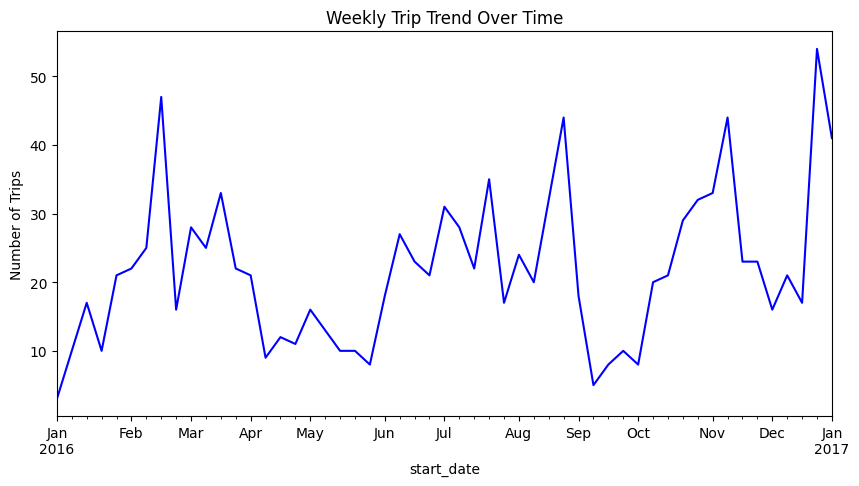

In [44]:
trend = data.groupby('start_date').size()
trend.resample('W').sum().plot(figsize=(10,5), color='blue')
plt.ylabel('Number of Trips')
plt.title('Weekly Trip Trend Over Time')


## 7. Advanced Analysis

### 7.1. Correlation Analysis
Examining the relationships between numerical columns can offer insights into potential trends or patterns.

Text(0.5, 1.0, 'Correlation Matrix for Numeric Columns')

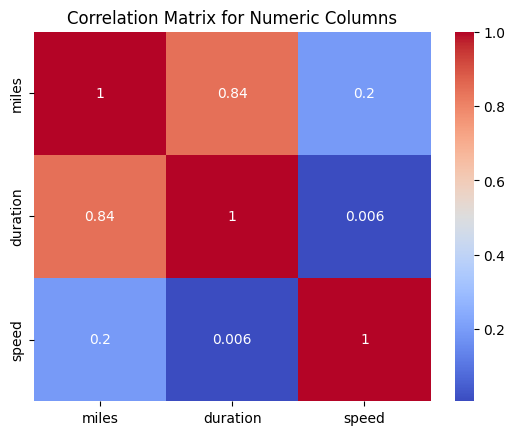

In [45]:
correlation_matrix = data[['miles', 'duration', 'speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')


### 7.2. Distribution of Trip Distances
Understanding the distribution of trip distances can help identify the most common trip lengths.

<ipython-input-46-45ee9181a194>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Distance (miles)')

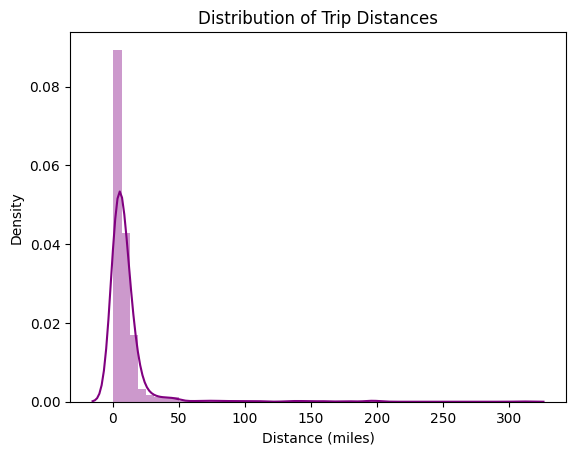

In [46]:
sns.distplot(data['miles'], kde=True, color='purple')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')


### 7.3. Distribution of Trip Durations
A look into the distribution of trip durations.

<ipython-input-47-f160b3fcbd30>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Duration (minutes)')

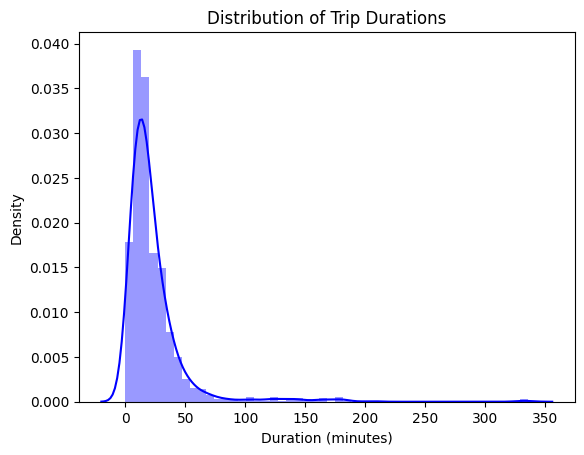

In [47]:
sns.distplot(data['duration'], kde=True, color='blue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')


### 7.4. Boxplots for Outlier Detection
Boxplots can help identify outliers in our data.

Text(0.5, 1.0, 'Boxplot of Distances by Trip Purpose')

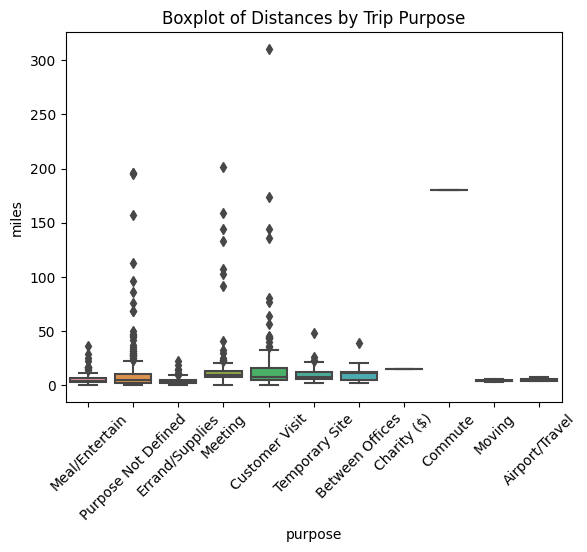

In [48]:
sns.boxplot(x=data['purpose'], y=data['miles'])
plt.xticks(rotation=45)
plt.title('Boxplot of Distances by Trip Purpose')


### 7.5. Day-wise Heatmap
A heatmap showing the frequency of rides based on day and hour can offer insights into peak usage times.

<ipython-input-49-3cbbf299a946>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



Text(0.5, 1.0, 'Heatmap of Trips by Day and Hour')

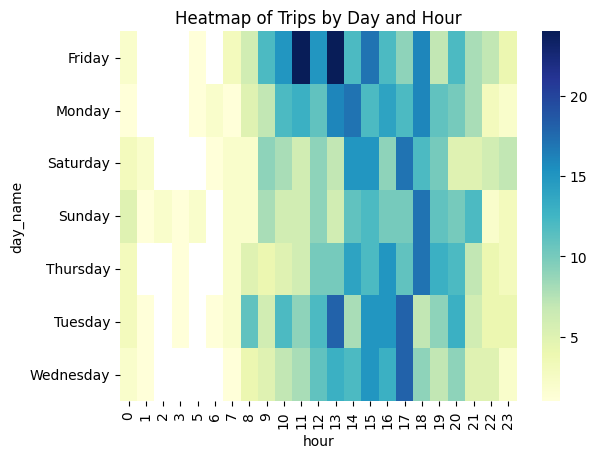

In [49]:
heatmap_data = data.groupby(['day_name', 'hour']).size().reset_index()
heatmap_data.columns = ['day_name', 'hour', 'count']
heatmap_pivot = heatmap_data.pivot('day_name', 'hour', 'count')
sns.heatmap(heatmap_pivot, cmap='YlGnBu')
plt.title('Heatmap of Trips by Day and Hour')


### Project by [Animesh Maity](https://github.com/animesh-am)